# Data Parsing and Visualisation 
--- 
This notebook demonstrates how we conduct data parsing and some simple EDA to visualise and analyse the data. 

## Part 1: Data Parsing 
The following is what we have done (in order): 
1. Read in data info csv as info, unzip dataset0.json.gz and read in the json data. 
2. Calculate the mean, median, std, min, max for the length, std and mean of the signal at each of the 3 positions (1-,central, 1+) and save the results into result_df. We have then generated 45 numerical features from our dataset0. 
3. Merged result_df with the label data. The final merged_data df have 121838 rows and 50 columns. 

In [2]:
import json
import pandas as pd

Please modify the datapath based on your local directory 

In [6]:
!gzip -d data/dataset0.json.gz

'gzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
info = pd.read_csv("data/data.info")

Before you run the following code, run !gzip -d dataset0.json.gz in the terminal to unzip the data file 

In [4]:
data_list = []

with open('data/dataset0.json', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_list.append(data)


In [5]:
def explore_dataset(data_list):
    a_results = []
    i = 0
    for data in data_list:
        trans_id, first = next(iter(data.items()))
        position, second = next(iter(first.items()))
        sequence, data = next(iter(second.items()))
        fixed_features = [trans_id, position, sequence]
        for obs in data:
            a_results.append(fixed_features + obs)
        if (i % 10000 == 0):
            print(i)
        i += 1
    print("done")
    return a_results

results = explore_dataset(data_list)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
done


In [6]:
result_df = pd.DataFrame(results)

In [7]:
colnames = ['transcript_id', 'transcript_position', 'sequence']
for i in ['-1_flank', 'central', '+1_flank']:
    for j in ["length", "std", "mean"]:
        colnames.append(i + '_' + j)
print(colnames)
result_df.columns = colnames

['transcript_id', 'transcript_position', 'sequence', '-1_flank_length', '-1_flank_std', '-1_flank_mean', 'central_length', 'central_std', 'central_mean', '+1_flank_length', '+1_flank_std', '+1_flank_mean']


In [8]:
result_df.shape

(11027106, 12)

In [9]:
result_df['transcript_position'] = result_df['transcript_position'].astype(int)

In [10]:
result_df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [11]:
# Function to split a sequence into 1-mers and 5-mers
def split_into_kmers(sequence, k):
    kmers = [sequence[i:i + k] for i in range(len(sequence) - k + 1)]
    return kmers

# Split sequences into 1-mers and 5-mers
result_df['1-mer'] = result_df['sequence'].apply(lambda x: split_into_kmers(x, 1))
result_df['5-mer'] = result_df['sequence'].apply(lambda x: split_into_kmers(x, 5))

for i in range(7):
    column_name = '1-mer_' + str(i)
    result_df[column_name] = result_df['1-mer'].apply(lambda x: x[i])

for i in range(3):
    column_name = '5-mer_' + str(i)
    result_df[column_name] = result_df['5-mer'].apply(lambda x: x[i])

In [12]:
result_df.drop(['1-mer', '5-mer'], axis=1, inplace=True)

In [13]:
result_df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,...,1-mer_0,1-mer_1,1-mer_2,1-mer_3,1-mer_4,1-mer_5,1-mer_6,5-mer_0,5-mer_1,5-mer_2
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA


In [14]:
result_df['transcript_id'].value_counts()

transcript_id
ENST00000216281    68776
ENST00000309311    50055
ENST00000534624    45392
ENST00000318607    44788
ENST00000353801    43445
                   ...  
ENST00000316694       20
ENST00000453348       20
ENST00000551765       20
ENST00000306735       20
ENST00000596271       20
Name: count, Length: 5333, dtype: int64

In [15]:
result_df['transcript_position'].value_counts()

transcript_position
334     12402
688     12009
702     11551
522     11538
317     11484
        ...  
5231       20
5525       20
7926       20
5261       20
5272       20
Name: count, Length: 7099, dtype: int64

In [24]:
result_df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='count')

,transcript_id,transcript_position,count
0,ENST00000000233,244,185
1,ENST00000000233,261,172
2,ENST00000000233,316,185
3,ENST00000000233,332,200
4,ENST00000000233,368,198
...,...,...,...
121833,ENST00000641834,1348,73
121834,ENST00000641834,1429,69
121835,ENST00000641834,1531,64
121836,ENST00000641834,1537,57


In [25]:
def downsample_to_50_rows(group):
    if len(group) > 50:
        return group.sample(50, random_state=4266)  # Change random_state for reproducibility
    else:
        return group

# Apply the downsampling function
balance_result_df = result_df.groupby(['transcript_id', 'transcript_position']).apply(downsample_to_50_rows).reset_index(drop=True)

KeyboardInterrupt: 

In [ ]:
file_path = "data/balanced_data.csv"

balance_result_df.to_csv(file_path, index=False)

In [3]:
file_path = "data/balanced_data.csv"
merged_data = pd.read_csv(file_path)

In [4]:
merged_data.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,...,1-mer_0,1-mer_1,1-mer_2,1-mer_3,1-mer_4,1-mer_5,1-mer_6,5-mer_0,5-mer_1,5-mer_2
0,ENST00000000233,244,AAGACCA,0.01260,3.77,128.0,0.00430,6.27,125.0,0.00465,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
1,ENST00000000233,244,AAGACCA,0.00610,3.99,121.0,0.01210,7.27,122.0,0.00232,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
2,ENST00000000233,244,AAGACCA,0.01230,5.04,106.0,0.01360,9.34,126.0,0.00399,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
3,ENST00000000233,244,AAGACCA,0.00421,4.47,124.0,0.00674,5.02,128.0,0.00716,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA
4,ENST00000000233,244,AAGACCA,0.01430,4.03,124.0,0.01370,9.85,125.0,0.01730,...,A,A,G,A,C,C,A,AAGAC,AGACC,GACCA


In [6]:
# List of features you want to calculate the standard deviation for
features_to_std = ["-1_flank_length", "-1_flank_std", "-1_flank_mean", "central_length", "central_std", "central_mean", "+1_flank_length", "+1_flank_std", "+1_flank_mean"]

df = merged_data.copy()
# Group by 'transcript_id' and 'transcript_position', then calculate the standard deviation
df[features_to_std] = merged_data.groupby(['transcript_id', 'transcript_position'])[features_to_std].transform('std')

In [7]:
df.columns = ['transcript_id', 'transcript_position', 'sequence', '-1_flank_length_std',
       '-1_flank_std_std', '-1_flank_mean_std', 'central_length_std', 'central_std_std',
       'central_mean_std', '+1_flank_length_std', '+1_flank_std_std', '+1_flank_mean_std',
       '1-mer_0', '1-mer_1', '1-mer_2', '1-mer_3', '1-mer_4', '1-mer_5',
       '1-mer_6', '5-mer_0', '5-mer_1', '5-mer_2']

In [8]:
df.drop(['1-mer_0', '1-mer_1', '1-mer_2', '1-mer_3', '1-mer_4', '1-mer_5',
       '1-mer_6', '5-mer_0', '5-mer_1', '5-mer_2', 'sequence'], axis=1, inplace=True)

In [13]:
df.drop(['sequence'], axis=1, inplace=True)

In [9]:
df = df.drop_duplicates()

In [10]:
df.head()

,transcript_id,transcript_position,-1_flank_length_std,-1_flank_std_std,-1_flank_mean_std,central_length_std,central_std_std,central_mean_std,+1_flank_length_std,+1_flank_std_std,+1_flank_mean_std
0,ENST00000000233,244,0.003633,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875
20,ENST00000000233,261,0.003665,2.123436,3.283131,0.005541,1.956153,3.828907,0.005357,1.189789,2.262881
40,ENST00000000233,316,0.004228,1.135815,0.788069,0.005905,0.852801,2.301281,0.004236,0.390257,1.547528
60,ENST00000000233,332,0.006694,2.637642,4.779342,0.005044,0.762332,1.871750,0.003671,0.678325,3.999868
80,ENST00000000233,368,0.006595,1.415910,3.126710,0.007034,1.887758,2.173404,0.008695,1.266139,2.065863


In [11]:
new_merged_data = pd.merge(merged_data, df, on=['transcript_id', 'transcript_position'], how='inner')

In [12]:
new_merged_data.columns

Index(['transcript_id', 'transcript_position', 'sequence', '-1_flank_length',
       '-1_flank_std', '-1_flank_mean', 'central_length', 'central_std',
       'central_mean', '+1_flank_length', '+1_flank_std', '+1_flank_mean',
       '1-mer_0', '1-mer_1', '1-mer_2', '1-mer_3', '1-mer_4', '1-mer_5',
       '1-mer_6', '5-mer_0', '5-mer_1', '5-mer_2', '-1_flank_length_std',
       '-1_flank_std_std', '-1_flank_mean_std', 'central_length_std',
       'central_std_std', 'central_mean_std', '+1_flank_length_std',
       '+1_flank_std_std', '+1_flank_mean_std'],
      dtype='object')

In [13]:
new_merged_data.shape

(2436760, 31)

In [14]:
new_merged_data.to_csv("data/std_merged_data.csv", index=False)

In [21]:
balance_result_df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='count')

,transcript_id,transcript_position,count
0,ENST00000000233,244,50
1,ENST00000000233,261,50
2,ENST00000000233,316,50
3,ENST00000000233,332,50
4,ENST00000000233,368,50
5,ENST00000000233,404,50


In [ ]:
info.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [ ]:
merged_data = pd.merge(result_df, info, on=['transcript_id', 'transcript_position'], how='inner')

In [ ]:
merged_data.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [ ]:
merged_data.shape

(11027106, 14)

<Axes: xlabel='label'>

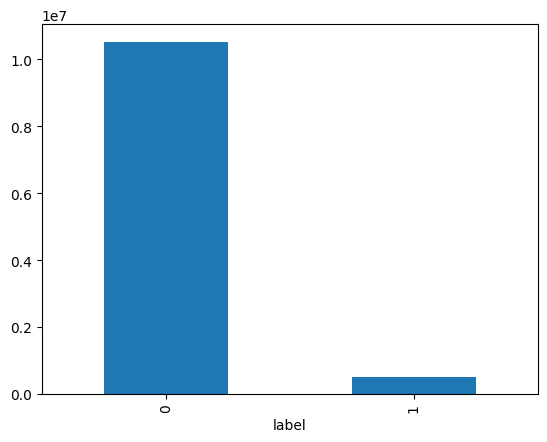

In [ ]:
# View distribution of labels 
merged_data['label'].value_counts().plot(kind='bar')

In [ ]:
file_path = "data/merged_data.csv"

merged_data.to_csv(file_path, index=False)

The data is highly imbalanced. given the large size of the data, we may consider to perform undersampling to truncate the label 0 to handle the imbalanced dataset. 